# Solutions

1. [Tidy Data with melt](#1.-Tidy-Data-with-melt)
1. [Reshaping by Pivoting](#2.-Reshaping-by-Pivoting)
1. [Common Messy Datasets](#3.-Common-messy-datasets)
1. [Why Tidy Data](#4.-Why-Tidy-Data)


# 1. Tidy Data with `melt`

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 40

In [2]:
movie = pd.read_csv('../data/movie.csv')
movie.head()

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,actor3,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
0,Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
1,Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
2,Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8
3,The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1


### Problem 1
<span  style="color:green; font-size:16px">In this problem, we will only look at the title column and the actor name columns. Restructure the dataset so that there are only three variables - the title of the movie, the actor number (1, 2, or 3), and the actor name. Sort the result by title and output the first 20 rows.</span>

In [3]:
actor_tidy = movie.melt(id_vars='title', 
                        value_vars=['actor1', 'actor2', 'actor3'], 
                        var_name='Actor Number',
                        value_name='Actor Name').sort_values('title')
actor_tidy.head(20)

,title,Actor Number,Actor Name
14181,#Horror,actor3,Lydia Hearst
9265,#Horror,actor2,Balthazar Getty
4349,#Horror,actor1,Timothy Hutton
13461,10 Cloverfield Lane,actor3,Sumalee Montano
8545,10 Cloverfield Lane,actor2,John Gallagher Jr.
3629,10 Cloverfield Lane,actor1,Bradley Cooper
7880,10 Days in a Madhouse,actor2,Kelly LeBrock
12796,10 Days in a Madhouse,actor3,Alexandra Callas
2964,10 Days in a Madhouse,actor1,Christopher Lambert
7715,10 Things I Hate About You,actor2,Heath Ledger


### Problem 2
<span  style="color:green; font-size:16px">Using the original movie dataset (and keeping its structure), attempt to count the total appearances of each actor in the dataset regardless whether they are 1, 2, or 3. Then repeat this task with your tidy dataset.</span>

We have not covered how to do the first part of the question. It becomes very easy with tidy data.

In [4]:
actor_ct = actor_tidy['Actor Name'].value_counts()
actor_ct.head()

Robert De Niro    53
Morgan Freeman    43
Bruce Willis      38
Matt Damon        37
Steve Buscemi     36
Name: Actor Name, dtype: int64

Advanced Pandas for first part. This is a pandas trick that uses the **`add`** method to add Series together:

In [5]:
vc1 = movie['actor1'].value_counts()
vc2 = movie['actor2'].value_counts()
vc3 = movie['actor3'].value_counts()

In [6]:
actor_ct2 = vc1.add(vc2, fill_value=0) \
               .add(vc3, fill_value=0) \
               .astype(int) \
               .sort_values(ascending=False)
actor_ct2.head()

Robert De Niro    53
Morgan Freeman    43
Bruce Willis      38
Matt Damon        37
Steve Buscemi     36
dtype: int64

### Problem 3
<span  style="color:green; font-size:16px">Tidy the dataset in the **`tidy/employee_messy1.csv`** file. It contains the count of all employees by race and gender.</span>

In [7]:
em = pd.read_csv('../data/tidy/employee_messy1.csv')
em

,race,Female,Male
0,Native American,6,5
1,Asian,30,77
2,Black,305,395
3,Hispanic,139,341
4,White,108,557


In [8]:
em.melt(id_vars='race', value_vars=['Female', 'Male'], 
        var_name='gender', value_name='count')

,race,gender,count
0,Native American,Female,6
1,Asian,Female,30
2,Black,Female,305
3,Hispanic,Female,139
4,White,Female,108
5,Native American,Male,5
6,Asian,Male,77
7,Black,Male,395
8,Hispanic,Male,341
9,White,Male,557


### Problem 4
<span  style="color:green; font-size:16px">Tidy the dataset in the **`tidy/employee_messy2.csv`** file. It contains the count of all employees by department, race and gender.</span>

In [9]:
em2 = pd.read_csv('../data/tidy/employee_messy2.csv')
em2.head()

,dept,gender,Asian,Black,Hispanic,White
0,Health & Human Services,Female,6,43,22,6
1,Health & Human Services,Male,5,10,5,6
2,Houston Fire Department (HFD),Female,0,7,8,6
3,Houston Fire Department (HFD),Male,1,62,91,203
4,Houston Police Department-HPD,Female,6,76,35,35


In [10]:
em2.melt(id_vars=['dept', 'gender'], 
         var_name='race', 
         value_name='count').head(10)

,dept,gender,race,count
0,Health & Human Services,Female,Asian,6
1,Health & Human Services,Male,Asian,5
2,Houston Fire Department (HFD),Female,Asian,0
3,Houston Fire Department (HFD),Male,Asian,1
4,Houston Police Department-HPD,Female,Asian,6
5,Houston Police Department-HPD,Male,Asian,33
6,Public Works & Engineering-PWE,Female,Asian,4
7,Public Works & Engineering-PWE,Male,Asian,25
8,Health & Human Services,Female,Black,43
9,Health & Human Services,Male,Black,10


### Problem 5
<span  style="color:green; font-size:16px">Tidy the dataset in the **`tidy/employee_salary_stats.csv`** file. Save the tidy dataset to a variable and then select all the median salaries. The select all the median salaries with the original 'messy' dataset. Which one is easier to read summary statistics from?</span>

In [11]:
em_stats = pd.read_csv('../data/tidy/employee_salary_stats.csv')
em_stats

,race,gender,min,mean,median,max
0,Native American,Female,26125,60238,58855,98536
1,Native American,Male,26125,60305,60347,81239
2,Asian,Female,26125,63226,57227,130416
3,Asian,Male,27914,61033,55461,163228
4,Black,Female,24960,48915,44491,150416
5,Black,Male,26125,51082,46486,275000
6,Hispanic,Female,26125,46503,43087,126115
7,Hispanic,Male,26104,54782,54090,165216
8,White,Female,27955,66793,62264,178331
9,White,Male,26125,63940,62540,210588


In [12]:
df_tidy = em_stats.melt(id_vars=['race', 'gender'], 
                        var_name='Statistic', 
                        value_name='Salary Value')
df_tidy.head(10)

,race,gender,Statistic,Salary Value
0,Native American,Female,min,26125
1,Native American,Male,min,26125
2,Asian,Female,min,26125
3,Asian,Male,min,27914
4,Black,Female,min,24960
5,Black,Male,min,26125
6,Hispanic,Female,min,26125
7,Hispanic,Male,min,26104
8,White,Female,min,27955
9,White,Male,min,26125


In [13]:
filt = df_tidy['Statistic'] == 'median'
df_tidy[filt]

,race,gender,Statistic,Salary Value
20,Native American,Female,median,58855
21,Native American,Male,median,60347
22,Asian,Female,median,57227
23,Asian,Male,median,55461
24,Black,Female,median,44491
25,Black,Male,median,46486
26,Hispanic,Female,median,43087
27,Hispanic,Male,median,54090
28,White,Female,median,62264
29,White,Male,median,62540


In [14]:
cols = ['race', 'gender', 'median']
em_stats[cols]

,race,gender,median
0,Native American,Female,58855
1,Native American,Male,60347
2,Asian,Female,57227
3,Asian,Male,55461
4,Black,Female,44491
5,Black,Male,46486
6,Hispanic,Female,43087
7,Hispanic,Male,54090
8,White,Female,62264
9,White,Male,62540


The messy dataset is probably easier, as it shows all the aggregated statistics for each race and gender in a single row. Aggregated values are generally easier to read as "messy" datasets.

# 2. Reshaping by Pivoting

### Problem 1
<span  style="color:green; font-size:16px">Read the file **`clean_movie1.csv`** and then use the **`pivot`** method to put the country names as the columns. Put the **`count`** as the new values for the DataFrame.</span>

In [15]:
cm = pd.read_csv('../data/tidy/clean_movie1.csv')
cm.head()

,content_rating,country,count
0,G,Australia,2
1,G,Canada,1
2,G,France,5
3,G,Germany,1
4,G,UK,11


In [16]:
cm.pivot(index='content_rating', columns='country', values='count')

country,Australia,Canada,France,Germany,India,Spain,UK,USA
content_rating,,,,,,,,
G,2.0,1.0,5.0,1.0,NaN,NaN,11.0,85.0
Not Rated,NaN,9.0,11.0,4.0,6.0,2.0,10.0,51.0
PG,11.0,10.0,12.0,11.0,2.0,2.0,70.0,544.0
PG-13,10.0,25.0,34.0,22.0,2.0,6.0,97.0,1168.0
R,25.0,64.0,63.0,49.0,3.0,21.0,198.0,1534.0


In [17]:
# can fill in the missing value with 0 and change type to integer
cm.pivot(index='content_rating', columns='country', values='count').fillna(0).astype(int)

country,Australia,Canada,France,Germany,India,Spain,UK,USA
content_rating,,,,,,,,
G,2,1,5,1,0,0,11,85
Not Rated,0,9,11,4,6,2,10,51
PG,11,10,12,11,2,2,70,544
PG-13,10,25,34,22,2,6,97,1168
R,25,64,63,49,3,21,198,1534


### Problem 2
<span  style="color:green; font-size:16px">Read in the NYC deaths dataset and select only males from 2007. Pivot this information so we can more clearly see the breakdown of causes of death by race. Assign the result to a variable.</span>

In [18]:
nyc_deaths = pd.read_csv('../data/nyc_deaths.csv')
nyc_deaths.head()

,year,cause,sex,race,deaths
0,2007,Accidents,F,Asian,32
1,2007,Accidents,F,Black,87
2,2007,Accidents,F,Hispanic,71
3,2007,Accidents,F,White,162
4,2007,Accidents,M,Asian,53


In [19]:
male_2007 = nyc_deaths[(nyc_deaths['year'] == 2007) & (nyc_deaths['sex'] == 'M')]
race_death = male_2007.pivot(index='cause', columns='race', values='deaths')
race_death

race,Asian,Black,Hispanic,Unknown,White
cause,,,,,
Accidents,53.0,158.0,154.0,13.0,297.0
Cancer,528.0,1523.0,1013.0,74.0,3356.0
Diabetes,47.0,246.0,177.0,20.0,237.0
Flu and Pneumonia,66.0,229.0,189.0,20.0,530.0
HIV,NaN,377.0,218.0,6.0,NaN
Heart Disease,496.0,2121.0,1327.0,122.0,5632.0
Homicide,NaN,267.0,114.0,NaN,NaN
Hypertension,25.0,137.0,NaN,NaN,123.0
Liver Disease,18.0,NaN,107.0,NaN,NaN


### Problem 3
<span  style="color:green; font-size:16px">Use the result from problem 2 and highlight the leading cause of death for each race. Is it the same for each one?</span>

Cancer is the most common among Asian and Pacific Islanders. Heart Disease for everyone else.

In [20]:
race_death.style.highlight_max()

race,Asian,Black,Hispanic,Unknown,White
cause,,,,,
Accidents,53,158,154,13,297
Cancer,528,1523,1013,74,3356
Diabetes,47,246,177,20,237
Flu and Pneumonia,66,229,189,20,530
HIV,nan,377,218,6,nan
Heart Disease,496,2121,1327,122,5632
Homicide,nan,267,114,nan,nan
Hypertension,25,137,nan,nan,123
Liver Disease,18,nan,107,nan,nan


### Problem 4
<span  style="color:green; font-size:16px">Read in the flights dataset. Find the total number of flights from each airline by their origin airport. Hint: When making a pivot table of just frequency, its not necessary to have a `values` column. Save the results to a variable.</span>

In [21]:
flights = pd.read_csv('../data/flights.csv')
flights.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,WN,1908,N8324A,LAX,SLC,1625,1723.0,58.0,10.0,1733.0,100.0,107.0,94.0,590,2007.0,3.0,1905,2010.0,65.0,0,0,NaN,31.0,0.0,0.0,34.0,0.0
1,2015,1,1,4,UA,581,N448UA,DEN,IAD,823,830.0,7.0,11.0,841.0,190.0,170.0,154.0,1452,1315.0,5.0,1333,1320.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,MQ,2851,N645MQ,DFW,VPS,1305,1341.0,36.0,18.0,1359.0,108.0,107.0,85.0,641,1524.0,4.0,1453,1528.0,35.0,0,0,NaN,0.0,0.0,35.0,0.0,0.0
3,2015,1,1,4,AA,383,N3EUAA,DFW,DCA,1555,1602.0,7.0,13.0,1615.0,160.0,146.0,126.0,1192,1921.0,7.0,1935,1928.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,WN,3047,N560WN,LAX,MCI,1720,1808.0,48.0,6.0,1814.0,185.0,176.0,166.0,1363,2300.0,4.0,2225,2304.0,39.0,0,0,NaN,0.0,0.0,17.0,22.0,0.0


In [22]:
airline_origin = flights.pivot_table(index='airline', columns='origin_airport', 
                                     aggfunc='size', fill_value=0)
airline_origin

origin_airport,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
airline,,,,,,,,,,
AA,233,219,4006,196,374,985,147,1496,879,365
AS,13,50,47,7,121,262,15,52,64,137
B6,0,26,21,0,122,127,0,73,19,155
DL,6620,227,140,99,302,734,1751,222,225,281
EV,1692,163,717,1713,0,0,203,1369,1,0
F9,148,635,43,44,112,39,45,139,54,58
HA,0,0,0,0,22,50,0,0,19,21
MQ,56,0,1570,2,0,6,4,1833,0,0
NK,119,122,269,141,317,124,99,286,39,0


### Problem 5
<span  style="color:green; font-size:16px">Highlight the origin airport with the most flights for each airline. Do a few online searches to determine if those airports are hubs for those airlines.</span>

In [23]:
airline_origin.style.highlight_max()

origin_airport,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
airline,,,,,,,,,,
AA,233,219,4006,196,374,985,147,1496,879,365
AS,13,50,47,7,121,262,15,52,64,137
B6,0,26,21,0,122,127,0,73,19,155
DL,6620,227,140,99,302,734,1751,222,225,281
EV,1692,163,717,1713,0,0,203,1369,1,0
F9,148,635,43,44,112,39,45,139,54,58
HA,0,0,0,0,22,50,0,0,19,21
MQ,56,0,1570,2,0,6,4,1833,0,0
NK,119,122,269,141,317,124,99,286,39,0


American Airlines (AA) has a [hub at DFW](https://www.quora.com/Where-are-the-American-Airlines-hubs)

### Problem 6
<span  style="color:green; font-size:16px">Read in the bikes dataset. For each type of weather event (the `events` column) find the median temperature for males and females.</span>

In [24]:
bikes = pd.read_csv('../data/bikes.csv')

In [25]:
bikes.pivot_table(index='events', columns='gender', 
                  values='temperature', aggfunc='median').style.highlight_max(axis='columns')

gender,Female,Male
events,,
clear,64,62.6
cloudy,61,57
fog,54,52
hazy,60.1,57.9
mostlycloudy,72,71.1
partlycloudy,71.1,69.1
rain,59,57.9
sleet,30.9,32
snow,28.45,28


### Problem 7
<span  style="color:green; font-size:16px">Reshape the movie dataset so that there are two columns, one for all of the actors and one for the content rating of each of their respective movies. Filter this DatFrame so that it contains the top 10 most common actors. Then create a table that displays the number of movies each actor made by content rating. The actor names should be in the index, with the content ratings in the columns, with the counts as the values.</span>

In [26]:
actor_rating = movie.melt(id_vars='content_rating', value_vars=['actor1', 'actor2', 'actor3'],
                         value_name='actor')
actor_rating = actor_rating.drop(columns='variable')
actor_rating.head()

,content_rating,actor
0,PG-13,CCH Pounder
1,PG-13,Johnny Depp
2,PG-13,Christoph Waltz
3,PG-13,Tom Hardy
4,NaN,Doug Walker


In [27]:
top10_actors = actor_rating['actor'].value_counts().index[:10]
top10_actors

Index(['Robert De Niro', 'Morgan Freeman', 'Bruce Willis', 'Matt Damon',
       'Steve Buscemi', 'Johnny Depp', 'Nicolas Cage', 'Brad Pitt',
       'Liam Neeson', 'Bill Murray'],
      dtype='object')

In [28]:
actor_rating_top10 = actor_rating[actor_rating['actor'].isin(top10_actors)]
actor_rating_top10.head()

,content_rating,actor
1,PG-13,Johnny Depp
13,PG-13,Johnny Depp
14,PG-13,Johnny Depp
18,PG-13,Johnny Depp
28,PG-13,Liam Neeson


In [29]:
actor_rating_top10.pivot_table(index='actor', columns='content_rating', aggfunc='size', fill_value=0)

content_rating,G,Not Rated,PG,PG-13,R,X
actor,,,,,,
Bill Murray,0,0,9,11,11,0
Brad Pitt,0,0,3,10,20,0
Bruce Willis,0,0,2,15,21,0
Johnny Depp,0,0,7,13,15,1
Liam Neeson,0,1,4,11,15,0
Matt Damon,1,0,2,18,16,0
Morgan Freeman,1,0,5,20,17,0
Nicolas Cage,0,0,5,9,19,0
Robert De Niro,0,0,4,12,37,0


# 3. Common messy datasets

### Problem 1
<span  style="color:green; font-size:16px">Make the **`country_hour_price.csv`** dataset tidy by putting all the hour columns into a single column.</span>

In [2]:
df = pd.read_csv('../data/tidy/country_hour_price.csv')
df

,ASID,BORDER,HOUR1,HOUR2
0,21,GERMANY,2,3
1,32,FRANCE,2,3
2,99,ITALY,2,3
3,77,USA,4,5
4,66,CANADA,4,5
5,55,MEXICO,4,5
6,44,INDIA,6,7
7,88,CHINA,6,7
8,111,JAPAN,6,7


In [3]:
df_tidy = df.melt(id_vars=['ASID', 'BORDER'], 
                  value_vars=['HOUR1', 'HOUR2'],
                  var_name = 'Hour')
df_tidy.head()

,ASID,BORDER,Hour,value
0,21,GERMANY,HOUR1,2
1,32,FRANCE,HOUR1,2
2,99,ITALY,HOUR1,2
3,77,USA,HOUR1,4
4,66,CANADA,HOUR1,4


In [4]:
df_tidy.dtypes

ASID       int64
BORDER    object
Hour      object
value      int64
dtype: object

### Problem 2
<span  style="color:green; font-size:16px">If the resulting DataFrame from problem 1 has the strings 'HOUR1' and 'HOUR2' as values in the hour column, then extract just the numerical part of the strings and reassign the result to the hour column.</span>

In [5]:
df_tidy['Hour'] = df_tidy['Hour'].str.extract('(\d)').astype('int')
df_tidy.head()

,ASID,BORDER,Hour,value
0,21,GERMANY,1,2
1,32,FRANCE,1,2
2,99,ITALY,1,2
3,77,USA,1,4
4,66,CANADA,1,4


In [6]:
df_tidy.dtypes

ASID       int64
BORDER    object
Hour       int64
value      int64
dtype: object

### Problem 3
<span  style="color:green; font-size:16px">Tidy the **`tidy/flights_status.csv`** dataset.</span>

In [46]:
fs = pd.read_csv('../data/tidy/flight_status.csv')
fs.head()

,airline,status,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
0,AA,Delayed,42,57,893,40,79,202,25,378,170,68
1,AA,On Time,191,162,3113,156,295,783,122,1118,709,297
2,AS,Delayed,3,4,2,1,12,23,4,7,5,23
3,AS,On Time,10,46,45,6,109,239,11,45,59,114
4,B6,Delayed,0,10,5,0,30,32,0,30,5,33


In [45]:
fs1 = fs.melt(id_vars=['airline', 'status'], var_name='airport', value_name='count')
fs1.head(15)

,airline,status,airport,count
0,AA,Delayed,ATL,42
1,AA,On Time,ATL,191
2,AS,Delayed,ATL,3
3,AS,On Time,ATL,10
4,B6,Delayed,ATL,0
5,B6,On Time,ATL,0
6,DL,Delayed,ATL,924
7,DL,On Time,ATL,5696
8,EV,Delayed,ATL,373
9,EV,On Time,ATL,1319


In [50]:
fs_tidy = fs1.pivot_table(index=['airline', 'airport'], columns='status', values='count', aggfunc='max')
fs_tidy.head()

status           Delayed  On Time
airline airport                  
AA      ATL           42      191
        DEN           57      162
        DFW          893     3113
        IAH           40      156
        LAS           79      295

In [52]:
fs_tidy_final = fs_tidy.reset_index().rename_axis(None, axis='columns')
fs_tidy_final.head(10)

,airline,airport,Delayed,On Time
0,AA,ATL,42,191
1,AA,DEN,57,162
2,AA,DFW,893,3113
3,AA,IAH,40,156
4,AA,LAS,79,295
5,AA,LAX,202,783
6,AA,MSP,25,122
7,AA,ORD,378,1118
8,AA,PHX,170,709
9,AA,SFO,68,297


### Problem 4
<span  style="color:green; font-size:16px">Tidy the **`tidy/metrics.csv`** dataset.</span>

In [53]:
df = pd.read_csv('../data/tidy/metrics.csv')
df

,year,metric,Black Male,Black Female,White Male,White Female,Hispanic Male,Hispanic Female
0,2010,income,54885,51058,53941,58671,55344,52187
1,2010,life expectancy,77,72,73,70,79,73
2,2011,income,57073,58494,59718,58239,53891,59914
3,2011,life expectancy,70,76,79,79,77,74
4,2012,income,57028,50207,52610,58672,55844,55632
5,2012,life expectancy,78,72,73,73,75,74


In [57]:
df1 = df.melt(id_vars=['year', 'metric'], var_name='race sex')
df1.head()

,year,metric,race sex,value
0,2010,income,Black Male,54885
1,2010,life expectancy,Black Male,77
2,2011,income,Black Male,57073
3,2011,life expectancy,Black Male,70
4,2012,income,Black Male,57028


In [72]:
df2 = df1.pivot_table(index=['year', 'race sex'], columns='metric', values='value', aggfunc='max')
df3 = df2.reset_index().rename_axis(None, axis='columns')
df3.head()

,year,race sex,income,life expectancy
0,2010,Black Female,51058,72
1,2010,Black Male,54885,77
2,2010,Hispanic Female,52187,73
3,2010,Hispanic Male,55344,79
4,2010,White Female,58671,70


In [73]:
df3[['race', 'sex']] = df3['race sex'].str.split(expand=True)
df3.head()

,year,race sex,income,life expectancy,race,sex
0,2010,Black Female,51058,72,Black,Female
1,2010,Black Male,54885,77,Black,Male
2,2010,Hispanic Female,52187,73,Hispanic,Female
3,2010,Hispanic Male,55344,79,Hispanic,Male
4,2010,White Female,58671,70,White,Female


In [74]:
df4 = df3.drop(columns='race sex')
df4.head()

,year,income,life expectancy,race,sex
0,2010,51058,72,Black,Female
1,2010,54885,77,Black,Male
2,2010,52187,73,Hispanic,Female
3,2010,55344,79,Hispanic,Male
4,2010,58671,70,White,Female


# 4. Why Tidy Data

### Problem 1
<span  style="color:green; font-size:16px">Tidy the dataset `Impaired_Driving_Death_Rate.csv`</span>

In [88]:
df = pd.read_csv('../data/tidy/Impaired_Driving_Death_Rate.csv')
df.head()

,State,Location,"All Ages, 2012","All Ages, 2014","Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014"
0,United States,"United States\n(39.759995942000046, -98.499998...",3.3,3.1,1.3,1.2,6.7,6.2,3.1,3.0,5.2,4.9,1.5,1.4
1,Alabama,"Alabama\n(32.84057234800002, -86.63185738799996)",5.5,5.5,2.7,2.1,10.3,10.0,5.0,5.5,8.4,8.6,2.9,2.6
2,Alaska,"Alaska\n(64.84507799500005, -147.72205958799998)",NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"Arizona\n(34.86597351900008, -111.76380664699997)",3.6,3.0,1.6,NaN,6.9,5.5,3.3,3.1,5.4,4.5,1.7,1.5
4,Arkansas,"Arkansas\n(34.74865032200006, -92.27448966799994)",5.1,4.6,NaN,NaN,10.5,6.3,4.3,5.4,8.1,7.2,2.2,2.2


In [89]:
lat_long = df['Location'].str.extract(r'\D+([0-9.]+), ([-0-9.]+)').astype('float')
lat_long.head()

,0,1
0,39.759996,-98.499999
1,32.840572,-86.631857
2,64.845078,-147.722060
3,34.865974,-111.763807
4,34.748650,-92.274490


In [90]:
df[['Latitude', 'Longitude']] = lat_long
df = df.drop(columns='Location')

In [91]:
df.head(10)

,State,"All Ages, 2012","All Ages, 2014","Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014",Latitude,Longitude
0,United States,3.3,3.1,1.3,1.2,6.7,6.2,3.1,3.0,5.2,4.9,1.5,1.4,39.759996,-98.499999
1,Alabama,5.5,5.5,2.7,2.1,10.3,10.0,5.0,5.5,8.4,8.6,2.9,2.6,32.840572,-86.631857
2,Alaska,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.845078,-147.722060
3,Arizona,3.6,3.0,1.6,NaN,6.9,5.5,3.3,3.1,5.4,4.5,1.7,1.5,34.865974,-111.763807
4,Arkansas,5.1,4.6,NaN,NaN,10.5,6.3,4.3,5.4,8.1,7.2,2.2,2.2,34.748650,-92.274490
5,California,2.0,2.2,0.9,1.0,4.5,4.6,1.8,2.0,3.2,3.4,1.0,1.1,37.638642,-120.999996
6,Colorado,2.5,3.0,NaN,1.7,5.6,5.6,2.0,2.6,3.9,4.6,1.1,1.3,38.843843,-106.133609
7,Connecticut,2.4,2.7,NaN,NaN,5.9,6.1,2.1,2.5,3.7,4.6,1.1,NaN,41.562661,-72.649840
8,Delaware,3.8,5.2,NaN,NaN,NaN,11.7,4.0,4.6,6.6,7.4,NaN,NaN,39.008834,-75.577736
9,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.890373,-77.031957


In [92]:
df_melt = df.melt(id_vars=['State', 'Latitude', 'Longitude'], 
                  value_name='Rate')
df_melt.head(10)

,State,Latitude,Longitude,variable,Rate
0,United States,39.759996,-98.499999,"All Ages, 2012",3.3
1,Alabama,32.840572,-86.631857,"All Ages, 2012",5.5
2,Alaska,64.845078,-147.722060,"All Ages, 2012",NaN
3,Arizona,34.865974,-111.763807,"All Ages, 2012",3.6
4,Arkansas,34.748650,-92.274490,"All Ages, 2012",5.1
5,California,37.638642,-120.999996,"All Ages, 2012",2.0
6,Colorado,38.843843,-106.133609,"All Ages, 2012",2.5
7,Connecticut,41.562661,-72.649840,"All Ages, 2012",2.4
8,Delaware,39.008834,-75.577736,"All Ages, 2012",3.8
9,District of Columbia,38.890373,-77.031957,"All Ages, 2012",NaN


In [93]:
# inspect the 'variable' column
df_melt['variable'].value_counts()

Ages 21-34, 2014    52
Female, 2014        52
Ages 0-20, 2014     52
Ages 21-34, 2012    52
Female, 2012        52
All Ages, 2012      52
Ages 35+, 2014      52
Ages 35+, 2012      52
All Ages, 2014      52
Ages 0-20, 2012     52
Male, 2012          52
Male, 2014          52
Name: variable, dtype: int64

In [94]:
df_melt['gender'] = df_melt['variable'].str.extract(r'(Male|Female)').fillna('All')
df_melt.head()

,State,Latitude,Longitude,variable,Rate,gender
0,United States,39.759996,-98.499999,"All Ages, 2012",3.3,All
1,Alabama,32.840572,-86.631857,"All Ages, 2012",5.5,All
2,Alaska,64.845078,-147.722060,"All Ages, 2012",NaN,All
3,Arizona,34.865974,-111.763807,"All Ages, 2012",3.6,All
4,Arkansas,34.748650,-92.274490,"All Ages, 2012",5.1,All


In [95]:
df_melt['year'] = df_melt['variable'].str.extract(r'([0-9]{4})').astype('int')
df_melt.head()

,State,Latitude,Longitude,variable,Rate,gender,year
0,United States,39.759996,-98.499999,"All Ages, 2012",3.3,All,2012
1,Alabama,32.840572,-86.631857,"All Ages, 2012",5.5,All,2012
2,Alaska,64.845078,-147.722060,"All Ages, 2012",NaN,All,2012
3,Arizona,34.865974,-111.763807,"All Ages, 2012",3.6,All,2012
4,Arkansas,34.748650,-92.274490,"All Ages, 2012",5.1,All,2012


In [96]:
df_melt['age'] = df_melt['variable'].str.extract(r'([0-9+-]+),').fillna('All')

In [97]:
df_melt = df_melt.drop(columns='variable')
df_melt.head(10)

,State,Latitude,Longitude,Rate,gender,year,age
0,United States,39.759996,-98.499999,3.3,All,2012,All
1,Alabama,32.840572,-86.631857,5.5,All,2012,All
2,Alaska,64.845078,-147.722060,NaN,All,2012,All
3,Arizona,34.865974,-111.763807,3.6,All,2012,All
4,Arkansas,34.748650,-92.274490,5.1,All,2012,All
5,California,37.638642,-120.999996,2.0,All,2012,All
6,Colorado,38.843843,-106.133609,2.5,All,2012,All
7,Connecticut,41.562661,-72.649840,2.4,All,2012,All
8,Delaware,39.008834,-75.577736,3.8,All,2012,All
9,District of Columbia,38.890373,-77.031957,NaN,All,2012,All


In [98]:
df_melt.dtypes

State         object
Latitude     float64
Longitude    float64
Rate         float64
gender        object
year           int64
age           object
dtype: object

### Alternative regex to get all variables at once

In [99]:
df_melt2 = df.melt(id_vars=['State', 'Latitude', 'Longitude'], value_name='Rate')
df_melt2['variable'].str.extract(r'^(All|Male|Female)? ?\D+([-0-9+]+)?, ([0-9]{4})').fillna('All').head()

,0,1,2
0,All,All,2012
1,All,All,2012
2,All,All,2012
3,All,All,2012
4,All,All,2012


In [100]:
import seaborn as sns
%matplotlib inline

/Users/Ted/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


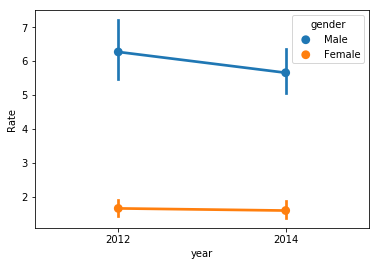

In [101]:
sns.pointplot(x='year', y='Rate', data=df_melt[df_melt['gender'] != 'All'], hue='gender')

### Problem 2
<span  style="color:green; font-size:16px">Tidy the dataset **`tidy/store_transactions.csv`**.</span>

In [102]:
st = pd.read_csv('../data/tidy/store_transactions.csv')
st

,store_number,store_address,customer_name,customer_join_date,customer_loyalty_number,transaction_id,product_name,product_price,quantity,transaction_time,transaction_bag_type
0,43,123 Fake St,John,5/3/2017,341,1,apple,0.50,10,1:45,paper
1,43,123 Fake St,John,5/3/2017,341,1,beef,5.99,3,1:45,paper
2,43,123 Fake St,John,5/3/2017,341,1,rice pudding,2.99,3,1:45,paper
3,43,123 Fake St,John,5/3/2017,341,1,milk,4.99,1,1:45,paper
4,22,55 Abbey Ln,Stephanie,2/2/1998,210,2,eggs,4.00,2,1:11,plastic
5,22,55 Abbey Ln,Stephanie,2/2/1998,210,2,apple,0.50,6,1:11,plastic
6,43,123 Fake St,Aria,6/6/2018,44,3,milk,4.99,3,3:44,paper
7,43,123 Fake St,Aria,6/6/2018,44,3,orange,0.99,3,3:44,paper
8,43,123 Fake St,Aria,6/6/2018,44,3,beef,5.99,1,3:44,paper
9,43,123 Fake St,Aria,6/6/2018,44,3,eggs,4.00,3,3:44,paper


### Problem 3
<span  style="color:green; font-size:16px">Use the **`pd.read_excel`** function to read the **`tidy/genetic_engineered.xlsx`** and tidy it (very difficult).</span>

In [103]:
df = pd.read_excel('../data/tidy/genetic_engineered.xls',header=1, skipfooter=21)
df

,,Insect-resistant (Bt) only,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Herbicide-tolerant only,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,State,2000,2001,2002,2003,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2000,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
1,,Percent of all corn planted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percent of all corn planted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Illinois,13,12,18,23,26.0,25.0,24.0,19.0,13.0,10.0,15.0,14.0,14.0,4.0,3.0,1.0,2.0,3,3.0,3.0,4.0,5.0,6.0,12.0,15.0,15.0,15.0,15.0,17.0,18.0,7.0,5.0,4.0,4.0
3,Indiana,7,6,7,8,11.0,11.0,13.0,12.0,7.0,7.0,7.0,7.0,9.0,2.0,2.0,4.0,2.0,4,6.0,6.0,7.0,8.0,11.0,15.0,17.0,16.0,17.0,20.0,22.0,15.0,10.0,8.0,8.0,9.0
4,Iowa,23,25,31,33,36.0,35.0,32.0,22.0,16.0,14.0,15.0,13.0,12.0,5.0,4.0,5.0,3.0,5,6.0,7.0,8.0,10.0,14.0,14.0,19.0,15.0,15.0,14.0,16.0,15.0,14.0,8.0,8.0,9.0
5,Kansas,25,26,25,25,25.0,23.0,23.0,25.0,25.0,24.0,22.0,28.0,20.0,7.0,5.0,4.0,4.0,7,11.0,15.0,17.0,24.0,30.0,33.0,36.0,30.0,29.0,28.0,22.0,19.0,15.0,18.0,12.0,12.0
6,Michigan,8,8,12,18,15.0,15.0,16.0,19.0,15.0,13.0,11.0,11.0,8.0,4.0,2.0,2.0,3.0,4,7.0,8.0,14.0,14.0,20.0,18.0,22.0,24.0,20.0,25.0,24.0,26.0,15.0,15.0,16.0,18.0
7,Minnesota,28,25,29,31,35.0,33.0,28.0,26.0,19.0,23.0,18.0,16.0,19.0,3.0,2.0,2.0,3.0,7,7.0,11.0,15.0,17.0,22.0,29.0,32.0,29.0,24.0,28.0,29.0,22.0,10.0,10.0,13.0,10.0
8,Missouri,20,23,27,32,32.0,37.0,38.0,30.0,27.0,23.0,15.0,27.0,18.0,5.0,4.0,5.0,4.0,6,8.0,6.0,9.0,13.0,12.0,14.0,19.0,21.0,17.0,19.0,22.0,20.0,16.0,10.0,9.0,8.0
9,Nebraska,24,24,34,36,41.0,39.0,37.0,31.0,27.0,26.0,22.0,15.0,16.0,6.0,4.0,4.0,3.0,8,8.0,9.0,11.0,13.0,18.0,24.0,23.0,24.0,23.0,24.0,26.0,20.0,13.0,15.0,10.0,15.0


In [104]:
varieties = [df.columns[1], df.iloc[18, 1], df.columns[18], df.iloc[18, 18]]
varieties

['Insect-resistant (Bt) only                                           ',
 'Stacked gene varieties',
 'Herbicide-tolerant only                                           ',
 'All GE varieties 3/']

In [105]:
varieties[-1] = varieties[-1][:-3]
varieties = [var.strip() for var in varieties]
varieties

['Insect-resistant (Bt) only',
 'Stacked gene varieties',
 'Herbicide-tolerant only',
 'All GE varieties']

In [106]:
df.columns = df.iloc[0]
df.head()

,State,2000,2001,2002,2003,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2000,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,State,2000,2001,2002,2003,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2000,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
1,,Percent of all corn planted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percent of all corn planted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Illinois,13,12,18,23,26.0,25.0,24.0,19.0,13.0,10.0,15.0,14.0,14.0,4.0,3.0,1.0,2.0,3,3.0,3.0,4.0,5.0,6.0,12.0,15.0,15.0,15.0,15.0,17.0,18.0,7.0,5.0,4.0,4.0
3,Indiana,7,6,7,8,11.0,11.0,13.0,12.0,7.0,7.0,7.0,7.0,9.0,2.0,2.0,4.0,2.0,4,6.0,6.0,7.0,8.0,11.0,15.0,17.0,16.0,17.0,20.0,22.0,15.0,10.0,8.0,8.0,9.0
4,Iowa,23,25,31,33,36.0,35.0,32.0,22.0,16.0,14.0,15.0,13.0,12.0,5.0,4.0,5.0,3.0,5,6.0,7.0,8.0,10.0,14.0,14.0,19.0,15.0,15.0,14.0,16.0,15.0,14.0,8.0,8.0,9.0


In [107]:
df_left = df.iloc[:, :18]
df_left = df_left.drop(index=[0, 1, 17, 18, 19, 20])
df_left['State'] = df_left['State'].str.extract(r'([a-zA-z .]+)')
df_left['Variety'] = [varieties[0]] * 15 + [varieties[1]] * 15
df_left_melt = df_left.melt(['State', 'Variety'], var_name='Year', value_name='Percent')
df_left_melt['Year'] = df_left_melt['Year'].astype('int')
df_left_melt['Percent'] = pd.to_numeric(df_left_melt['Percent'], errors='coerce')
df_left_melt.head()

,State,Variety,Year,Percent
0,Illinois,Insect-resistant (Bt) only,2000,13.0
1,Indiana,Insect-resistant (Bt) only,2000,7.0
2,Iowa,Insect-resistant (Bt) only,2000,23.0
3,Kansas,Insect-resistant (Bt) only,2000,25.0
4,Michigan,Insect-resistant (Bt) only,2000,8.0


In [108]:
df_right = df.iloc[:, 18:]
df_right = df_right.drop(index=[0, 1, 17, 18, 19, 20])
df_right['State'] = df_left['State']
df_right['Variety'] = [varieties[2]] * 15 + [varieties[3]] * 15
df_right_melt = df_right.melt(['State', 'Variety'], var_name='Year', value_name='Percent')
df_right_melt['Year'] = df_right_melt['Year'].astype('int')
df_right_melt['Percent'] = pd.to_numeric(df_right_melt['Percent'], errors='coerce')
df_right_melt.head()

,State,Variety,Year,Percent
0,Illinois,Herbicide-tolerant only,2000,3.0
1,Indiana,Herbicide-tolerant only,2000,4.0
2,Iowa,Herbicide-tolerant only,2000,5.0
3,Kansas,Herbicide-tolerant only,2000,7.0
4,Michigan,Herbicide-tolerant only,2000,4.0


In [109]:
df_left.head()

,State,2000,2001,2002,2003,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,Variety
2,Illinois,13,12,18,23,26.0,25.0,24.0,19.0,13.0,10.0,15.0,14.0,14.0,4.0,3.0,1.0,2.0,Insect-resistant (Bt) only
3,Indiana,7,6,7,8,11.0,11.0,13.0,12.0,7.0,7.0,7.0,7.0,9.0,2.0,2.0,4.0,2.0,Insect-resistant (Bt) only
4,Iowa,23,25,31,33,36.0,35.0,32.0,22.0,16.0,14.0,15.0,13.0,12.0,5.0,4.0,5.0,3.0,Insect-resistant (Bt) only
5,Kansas,25,26,25,25,25.0,23.0,23.0,25.0,25.0,24.0,22.0,28.0,20.0,7.0,5.0,4.0,4.0,Insect-resistant (Bt) only
6,Michigan,8,8,12,18,15.0,15.0,16.0,19.0,15.0,13.0,11.0,11.0,8.0,4.0,2.0,2.0,3.0,Insect-resistant (Bt) only


In [110]:
df_final = pd.concat([df_left_melt, df_right_melt], ignore_index=True)
df_final.head()

,State,Variety,Year,Percent
0,Illinois,Insect-resistant (Bt) only,2000,13.0
1,Indiana,Insect-resistant (Bt) only,2000,7.0
2,Iowa,Insect-resistant (Bt) only,2000,23.0
3,Kansas,Insect-resistant (Bt) only,2000,25.0
4,Michigan,Insect-resistant (Bt) only,2000,8.0


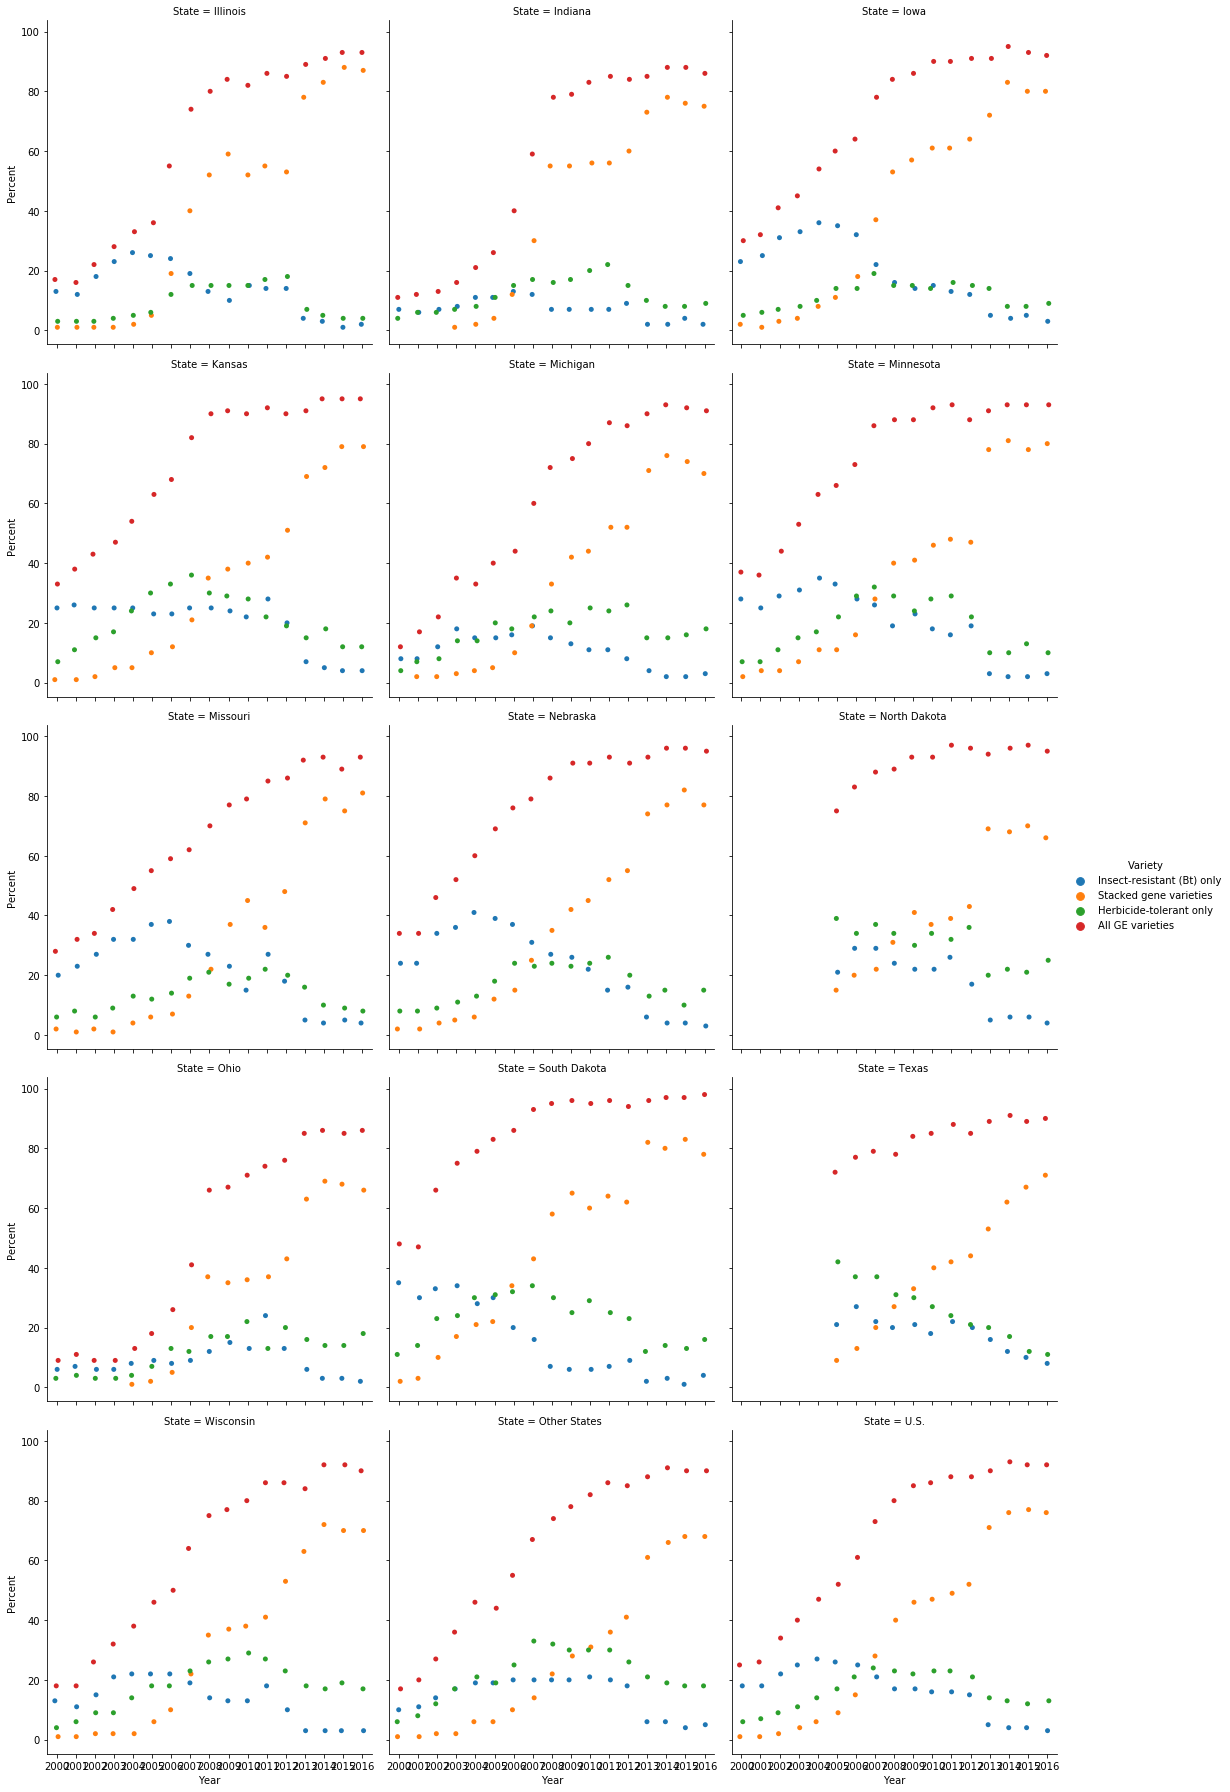

In [112]:
sns.catplot(x='Year', 
               y='Percent', 
               hue='Variety',
               col='State',
               col_wrap=3,
               data=df_final, 
               ci=0)